In [3]:
#importing the libraries
import cv2
import numpy as np

In [4]:
""" 
We are using the -> Haarcascade Classifier
It is image processing algorithm, using Machine Learning (Adaboost training on Haar features) aplying on the cascading features.

The xml file contains the cascading feature information which is then applied on the image to identify the object to detect.
"""
# xml file containing detection model.
faceCascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

# read image and convert to grayscale
img = cv2.imread('car.jpg')[:, :, ::-1]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
import copy

# apply algorithm to find edges of the box
faces = faceCascade.detectMultiScale(gray,scaleFactor=1.2,
    minNeighbors = 5, minSize=(25,25))

blurred_img = 0
# trace edges of the box on the image
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
    blurred_img = copy.deepcopy(gray)
    plate = blurred_img[y: y+h, x:x+w]
    plate = cv2.blur(plate,ksize=(20,20))
    # put the blurred plate into the original image
    blurred_img[y: y+h, x:x+w] = plate


(168, 299, 3)
(168, 299)


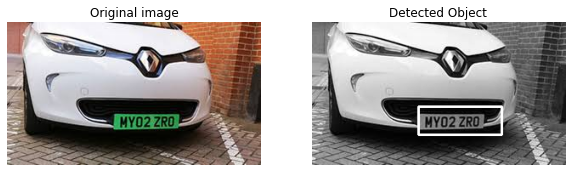

In [11]:
from matplotlib import pyplot as plt
#image plots
fig = plt.figure(figsize=(10, 5))

#original image
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original image")

#detected number plate
fig.add_subplot(1, 2, 2)
plt.imshow(gray, cmap = 'gray')
plt.axis('off')
plt.title("Detected Object")

plt.show()